In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('uber-raw-data-sep14.csv')
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [2]:
# This data contains data about date and time, latitude and longitude and a Base column that contains code affiliated with the Uber pickup.
# For now, let's prepare the data to analyze the Uber trips according to days and hours.

In [4]:
# We have prepared this data according tp the days and hours.

data['Day'] = data['Date/Time'].apply(lambda x: x.day)
data['Weekday'] = data['Date/Time'].apply(lambda x: x.weekday())
data['Hour'] = data['Date/Time'].apply(lambda x: x.hour)
data.head()

,Date/Time,Lat,Lon,Base,Day,Weekday,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,1,0,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,1,0,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,1,0,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,1,0,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,1,0,0


<AxesSubplot:xlabel='Day', ylabel='Density'>

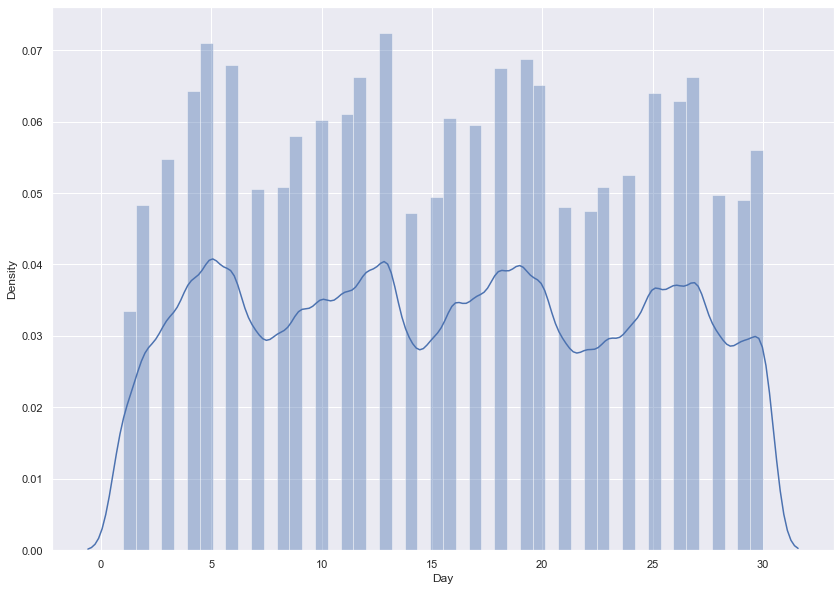

In [15]:
# Let's have a look at each day to see on which day the uber trips were highest.

plt.figure(figsize=(14,10))
sns.set(rc={'figure.figsize': (14,14)})
sns.distplot(data['Day'] )

C:\Users\User\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

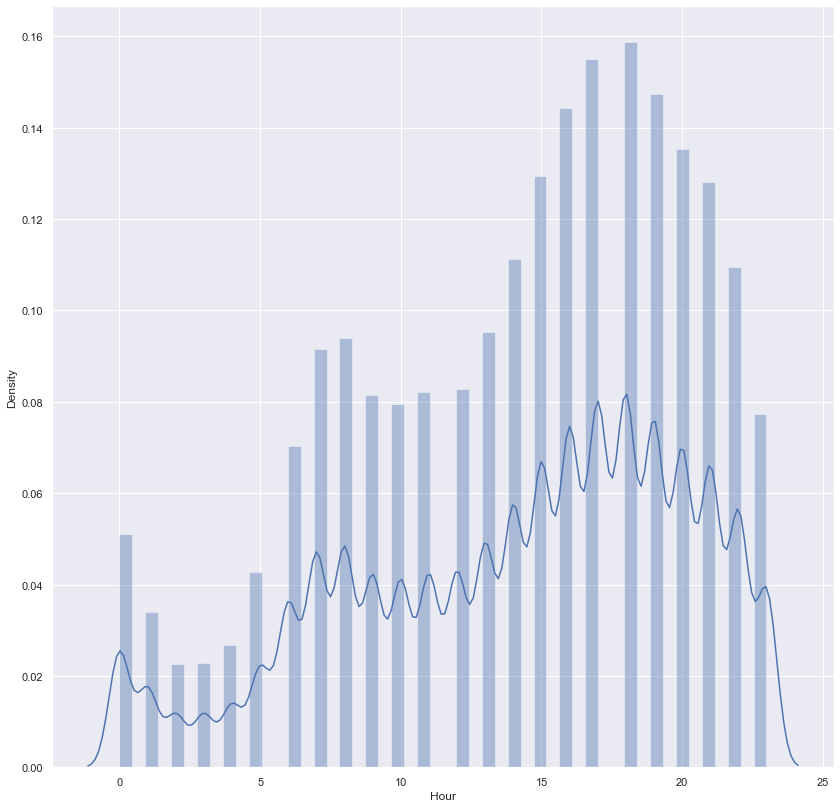

In [16]:
# By looking at the daily trips, we can say that the uber trips are rising on working days and decreases on the weekends.
# Now, let's analyse the uber trips according to the hours.

sns.distplot(data['Hour'])

In [17]:
# According to the hourly data, The uber trips decreases after midnight and then starts increasing after 5am and the trips keep rising till 6pm such that 6pm is the busiest hour for uber trips and then the trips start decreasing.

C:\Users\User\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

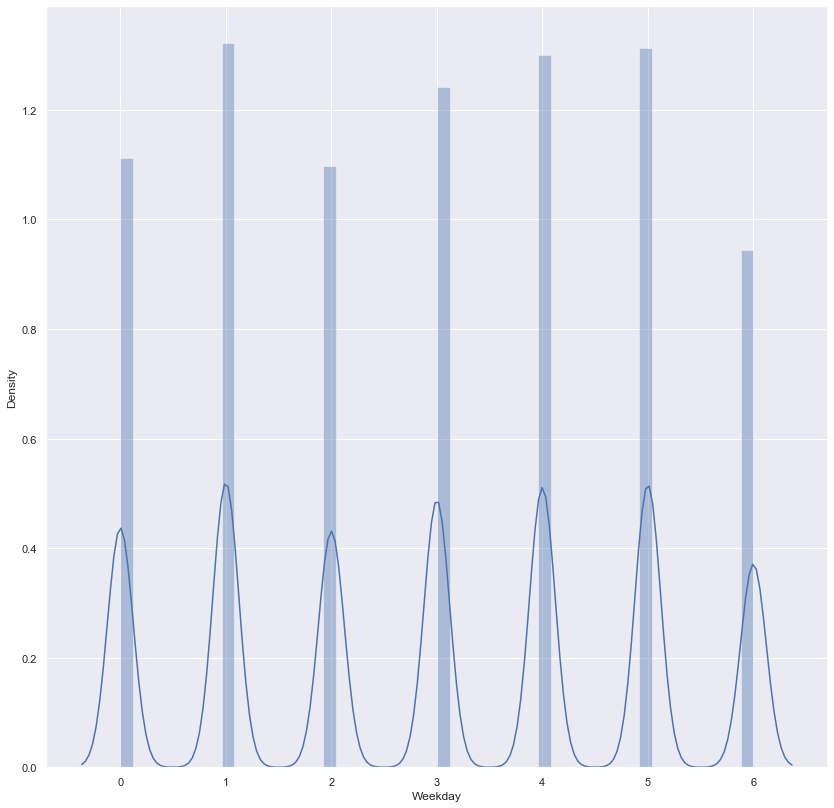

In [19]:
# Now, let's analyze the Uber trip according to the Weekdays.
sns.distplot(data['Weekday'])

## In the above figure 0 indicates Sunday, on Sundays the Uber trips and more than Saturdays so we can say people also use Uber for outings rather than for just going to work. On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest. 

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

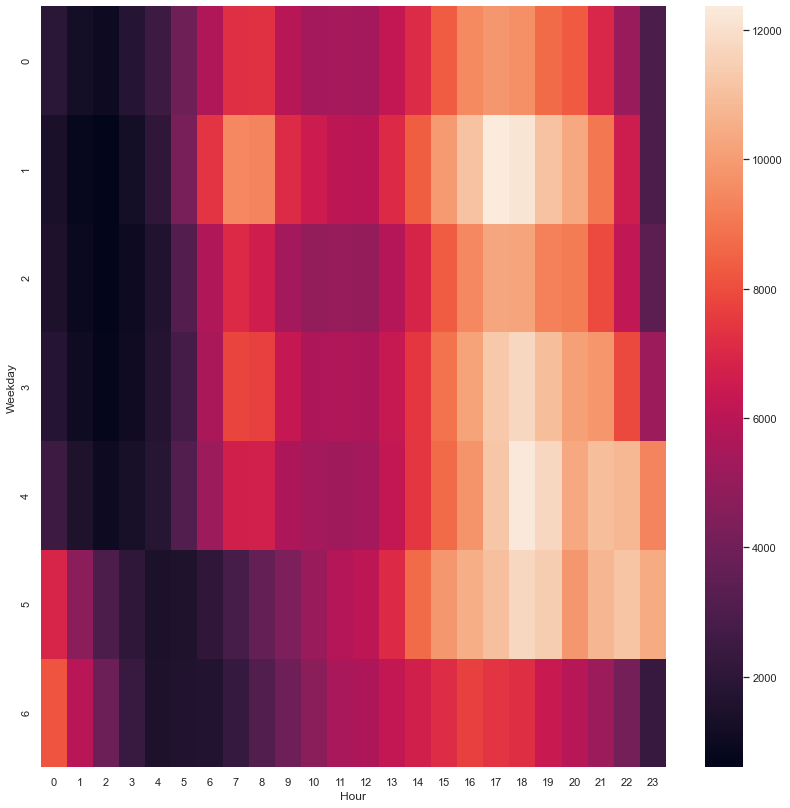

In [23]:
# Now, let's have a look at the correlation of the hours and weekdays on the uber trips.

df = data.groupby(['Weekday', 'Hour']).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

## As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


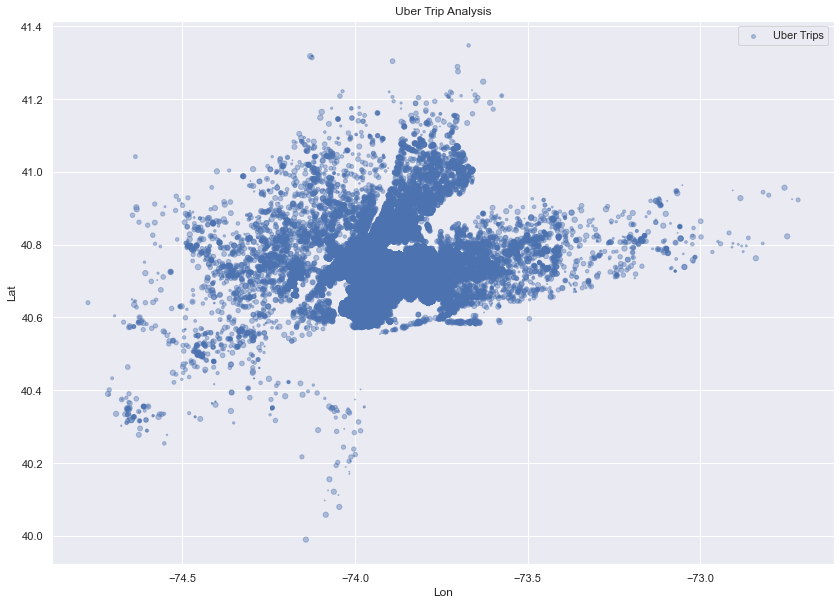

In [24]:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips', figsize=(14, 10), cmap=plt.get_cmap('jet'))
plt.title('Uber Trip Analysis')
plt.legend()
plt.show()

## Conclusion


## 1.Monday is the most profitable day for Uber
## 2.On Saturdays less number of people use Uber
## 3.6 pm is the busiest day for Uber
## 4.On average a rise in Uber trips start around 5 am.
## 5.Most of the Uber trips originate near the Manhattan region       in   New York.